<div style="text-align: center; background-color: #750E21; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  FINAL PROJECT: RESEARCHING ON MUSIC TASTE WORLDWIDELY 📌
</div>

<div style="text-align: center; background-color: #0766AD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 04 - Modelling 📌
</div>

## **IMPORT LIBRARY**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from math import sqrt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  PROBLEM 🔥
</div>

### Name of the problem

Based on some features of a song such as danceability, energy, loudness,... predict Popularity Score on Spotify.

### Introduction

Spotify is a digital music service that enables users to remotely source millions of different songs on various record labels from a laptop, smartphone or other device. To recommend new music to users, and to be able to internally classify songs, Spotify assigns each song values from 13 different attributes/features. These features are mostly numerical values, but include some categorical data as well (the key the song is in, for instance). Spotify also assigns each song a popularity score, based on total number of clicks/listens.

In our problem, we decide to use features such as danceability, energy, key,... to predict the Popularity Score that it is likely to receive when it is published on Spotify. And the method that we are going to use is regression. 

Regression analysis is a statistical technique that aims to model the relationship between a dependent variable and one or more independent variables. It is a powerful tool widely used in various fields, including economics, finance, biology, and social sciences, to understand and quantify the influence of independent variables on the outcome of interest.

The fundamental idea behind regression is to identify and analyze the patterns within the data, allowing us to make predictions, infer relationships, and gain insights into the underlying structure of the system being studied. 

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  STEP 01: PREPROCESSING 🔥
</div>

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  1. Overview of the data 🔥
</div>

First, we will the audio features file that we have been preprocessed before.

In [30]:
df = pd.read_csv('../data/processed/merge_data.csv')
df.head()

,Id,Song Name,Artist Name,Channel_name,View,Like,Subscriber,Hashtag,Most view per day,Highest rank,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,9bZkp7q19f0,Gangnam Style (강남스타일),PSY,officialpsy,4.977100e+09,27830052.0,18400000.0,4.0,14924298,1.0,...,11.0,-2.871,0.0,0.2860,0.00417,0.000000,0.0910,0.749,132.067,4.0
1,hT_nvWreIhg,Counting Stars,OneRepublic,OneRepublicVEVO,3.927344e+09,17491157.0,5470000.0,2.0,3288973,4.0,...,1.0,-4.972,0.0,0.0382,0.06540,0.000000,0.1180,0.477,122.016,4.0
2,JGwWNGJdvx8,Shape of You,Ed Sheeran,Ed Sheeran,6.149237e+09,32323841.0,53900000.0,3.0,14390704,1.0,...,1.0,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0
3,lp-EO5I60KA,Thinking out Loud,Ed Sheeran,Ed Sheeran,3.700048e+09,14912926.0,53900000.0,3.0,3771622,3.0,...,2.0,-6.061,1.0,0.0295,0.47400,0.000000,0.1840,0.591,78.998,4.0
4,CevxZvSJLk8,Roar,Katy Perry,KatyPerryVEVO,3.918655e+09,16596026.0,24600000.0,0.0,11294380,2.0,...,7.0,-4.821,0.0,0.0418,0.00487,0.000007,0.3540,0.455,179.984,4.0


Now let's see the data type of each column.

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          2500 non-null   object 
 1   Song Name                   2500 non-null   object 
 2   Artist Name                 2500 non-null   object 
 3   Channel_name                2491 non-null   object 
 4   View                        2500 non-null   float64
 5   Like                        2500 non-null   float64
 6   Subscriber                  2500 non-null   float64
 7   Hashtag                     2500 non-null   float64
 8   Most view per day           2500 non-null   int64  
 9   Highest rank                2500 non-null   float64
 10  Most-view-date              2500 non-null   object 
 11  Charted-duration            2500 non-null   float64
 12  Popularity Score (Spotify)  2500 non-null   int64  
 13  Duration                    2491 

- Our data has a total of 32 features (21 of them are numerical) and each row represents for a specific song on both Youtube and Spotify platform.
- Since the Id is unique for each song, we have 2500 songs in our data.
- Dependent variable is the Popularity Score - a value between 0 and 100 based on total recent streams.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  2. Choosing features for modelling 🔍🔍🔍
</div>

## **Some comments and decisions**

- Since `popularity` is scored on Spotify, we will skip all the elements that we get from Youtube including: `View`, `Like`, `Subscribe`, `Hashtag`, `Most view per day`, `Highest rank`, `Charted-duration`.
- All the object features can not be used for modelling so we will skip all of them.
- The other features including 13 numerical features: `danceability`, `energy`, `key`, `loudness`, `mode`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, `tempo`, `duration_ms`, `time_signature` will all be used for modelling.

👉 So we will extract all the features that been mentioned above.

In [32]:
new_df = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
             'valence', 'tempo', 'duration_ms', 'time_signature', 'Popularity Score (Spotify)']]
new_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Popularity Score (Spotify)
0,0.727,0.937,11.0,-2.871,0.0,0.2860,0.00417,0.000000,0.0910,0.749,132.067,219493.0,4.0,75
1,0.664,0.705,1.0,-4.972,0.0,0.0382,0.06540,0.000000,0.1180,0.477,122.016,257267.0,4.0,88
2,0.825,0.652,1.0,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,233713.0,4.0,88
3,0.781,0.445,2.0,-6.061,1.0,0.0295,0.47400,0.000000,0.1840,0.591,78.998,281560.0,4.0,85
4,0.554,0.772,7.0,-4.821,0.0,0.0418,0.00487,0.000007,0.3540,0.455,179.984,223546.0,4.0,74


We will use this new dataframe for the rest of this notebook.

👀 Let's see again the meaning of our chosen features

## **Description of 13 numerical features for each row**

<table style="width: 100%; border-collapse: collapse;font-family: 'Trebuchet MS', Arial, sans-serif;">
  <thead>
    <tr>
      <th style="min-width: 10px; width: 30px; background-color: #4E70BB; color: white; font-size :20px; font-weight: bold; text-align: left; padding: 8px;">No</th>
      <th style="background-color: #4E70BB; color: white; font-size :20px; font-weight: bold; text-align: left; padding: 8px;">Column Name</th>
      <th style="background-color: #4E70BB; color: white; font-size :20px; font-weight: bold; text-align: left; padding: 8px;">Meaning</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">1</td>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">danceability</td>
      <td style="font-size: 17px; text-align: left;">A measure of how suitable a track is for dancing.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">2</td>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">energy</td>
      <td style="font-size: 17px; text-align: left;">The intensity and activity of a track. High-energy tracks are generally fast, loud, and noisy.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #009A80; text-align: left;">3</td>
      <td style="font-weight: bold; font-size: 17px; color: #009A80; text-align: left;">key</td>
      <td style="font-size: 17px; text-align: left;">The key of the track.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">4</td>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">loudness</td>
      <td style="font-size: 17px; text-align: left;">The overall loudness of a track in decibels (dB).</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #EAE509; text-align: left;">5</td>
      <td style="font-weight: bold; font-size: 17px; color: #EAE509; text-align: left;">mode</td>
      <td style="font-size: 17px; text-align: left;">Indicates the modality of the track. Major is represented by 1 and minor is 0.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #3081D0; text-align: left;">6</td>
      <td style="font-weight: bold; font-size: 17px; color: #3081D0; text-align: left;">speechiness</td>
      <td style="font-size: 17px; text-align: left;">The presence of spoken words in a track. </td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">7</td>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">acousticness</td>
      <td style="font-size: 17px; text-align: left;">Represents the likelihood of the track being acoustic.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">8</td>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">instrumentalness</td>
      <td style="font-size: 17px; text-align: left;">Predicts whether a track contains no vocals.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #00A9FF; text-align: left;">9</td>
      <td style="font-weight: bold; font-size: 17px; color: #00A9FF; text-align: left;">liveness</td>
      <td style="font-size: 17px; text-align: left;">Detects the presence of an audience in the recording.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">10</td>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">valence</td>
      <td style="font-size: 17px; text-align: left;">The musical positiveness conveyed by a track.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #EAE509; text-align: left;">11</td>
      <td style="font-weight: bold; font-size: 17px; color: #EAE509; text-align: left;">tempo</td>
      <td style="font-size: 17px; text-align: left;">The overall estimated tempo of a track in beats per minute (BPM).</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #EAE509; text-align: left;">12</td>
      <td style="font-weight: bold; font-size: 17px; color: #EAE509; text-align: left;">duration_ms</td>
      <td style="font-size: 17px; text-align: left;">The duration of the track in milliseconds</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #3081D0; text-align: left;">13</td>
      <td style="font-weight: bold; font-size: 17px; color: #3081D0; text-align: left;">time_signature</td>
      <td style="font-size: 17px; text-align: left;">Specify how many beats are in each bar or measure</td>
    </tr>
  </tbody>
</table>

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  3. Exploratory 🧮
</div>

## **Histogram**

👀 First we are going to see the distribution of our `Popularity Score (Spotify)`.    
👀 We will use histogram to show the distribution and we will use bins = 20.

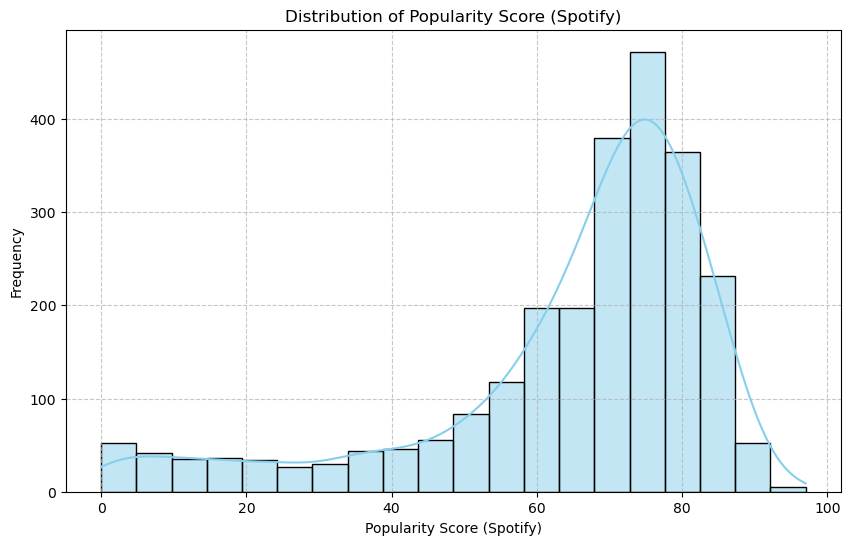

In [33]:
# Plotting a histogram for the 'Popularity Score (Spotify)' column
plt.figure(figsize=(10, 6))
sns.histplot(new_df['Popularity Score (Spotify)'], bins=20, kde=True, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Popularity Score (Spotify)')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity Score (Spotify)')

# Adding a grid (caro background)
plt.grid(True, linestyle='--', alpha=0.7)


### **Observation**   

- Overall, looking at the histogram, we can see that most of the songs in our data are rated pretty high. 
- In addition, the majority of them have a popularity score more than 70. 
- As such, it appears that this dataset is pretty balanced, the values spread all the way from 0 to approximately 100.

## **Correlation**

We will calculate the correlation between each feature to see if there is a linear relationship between them or not.

In [34]:
correlations = pd.DataFrame(new_df, columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                                             'valence', 'tempo', 'duration_ms', 'time_signature', 'Popularity Score (Spotify)']).corr()

In [35]:
correlations

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Popularity Score (Spotify)
danceability,1.000000,0.102625,-0.020455,0.144352,-0.058363,0.167559,-0.157745,0.007764,-0.167310,0.418708,-0.101796,-0.209626,0.170667,0.002877
energy,0.102625,1.000000,0.038290,0.678188,-0.098198,0.080264,-0.460391,-0.061933,0.134272,0.395186,0.072999,-0.070585,0.135718,-0.019903
key,-0.020455,0.038290,1.000000,-0.012512,-0.107537,0.035139,-0.005185,0.005719,-0.006650,0.030423,-0.015794,0.027939,-0.008716,-0.045006
loudness,0.144352,0.678188,-0.012512,1.000000,-0.029525,0.055930,-0.321521,-0.233861,0.063027,0.263379,0.054258,-0.141219,0.103142,0.110531
mode,-0.058363,-0.098198,-0.107537,-0.029525,1.000000,-0.052070,0.056441,-0.008180,0.041833,-0.058031,0.009299,-0.029536,-0.016154,-0.016014
speechiness,0.167559,0.080264,0.035139,0.055930,-0.052070,1.000000,-0.070488,-0.045369,0.007201,0.074957,0.152538,-0.060402,0.063866,-0.006072
acousticness,-0.157745,-0.460391,-0.005185,-0.321521,0.056441,-0.070488,1.000000,-0.003800,0.036220,-0.071795,-0.074203,0.084491,-0.164646,-0.148158
instrumentalness,0.007764,-0.061933,0.005719,-0.233861,-0.008180,-0.045369,-0.003800,1.000000,-0.014973,-0.107735,0.004888,-0.022250,-0.030108,-0.216257
liveness,-0.167310,0.134272,-0.006650,0.063027,0.041833,0.007201,0.036220,-0.014973,1.000000,-0.022537,0.022797,0.033078,0.008156,-0.069416
valence,0.418708,0.395186,0.030423,0.263379,-0.058031,0.074957,-0.071795,-0.107735,-0.022537,1.000000,0.018175,-0.097496,0.052123,-0.068008


Visualization this correlations by using heatmap

<Axes: >

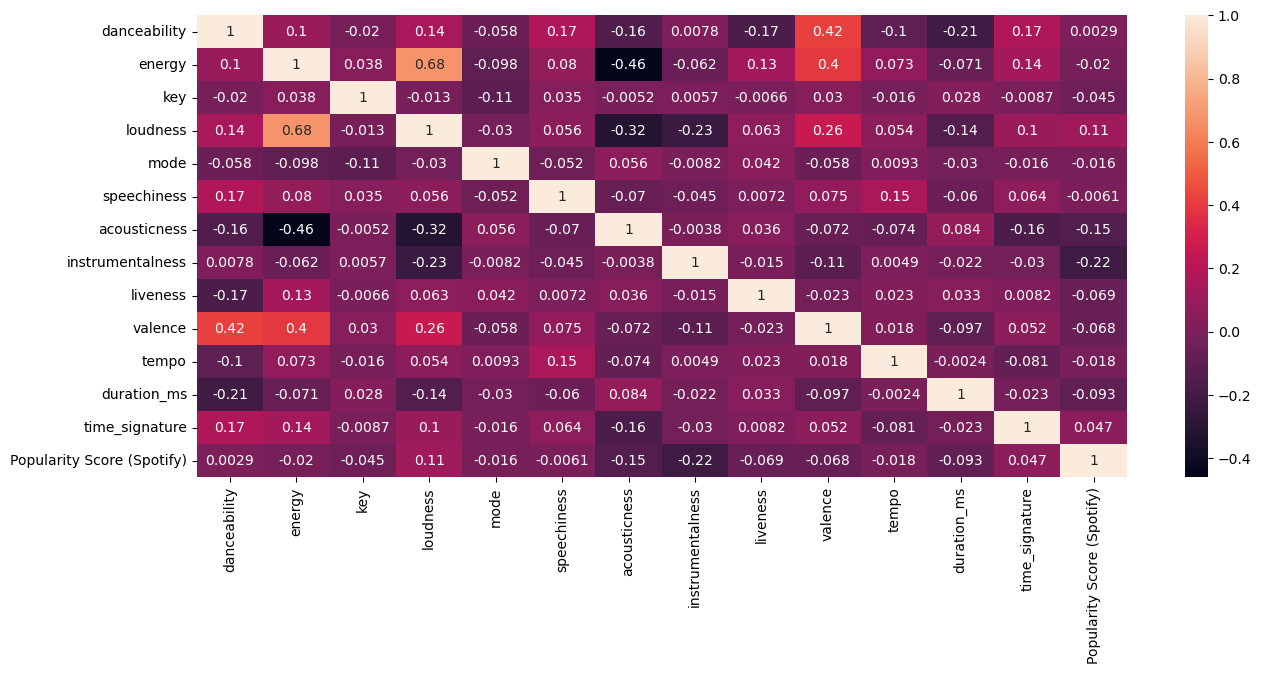

In [36]:
plt.figure(figsize=(15,6))
sns.heatmap(correlations, annot=True)

### **Observation**

- Overall, there aren't too many independent variables with high correlation values, but energy/loudness could potentially cause problems. 
- One thing potentially worrying about this though: not much correlation between independent variables and popularity. This could have pretty big implications for fitting a linear model.

👀 We will continue to plot our data for clearer visual.

## **Plotting data**

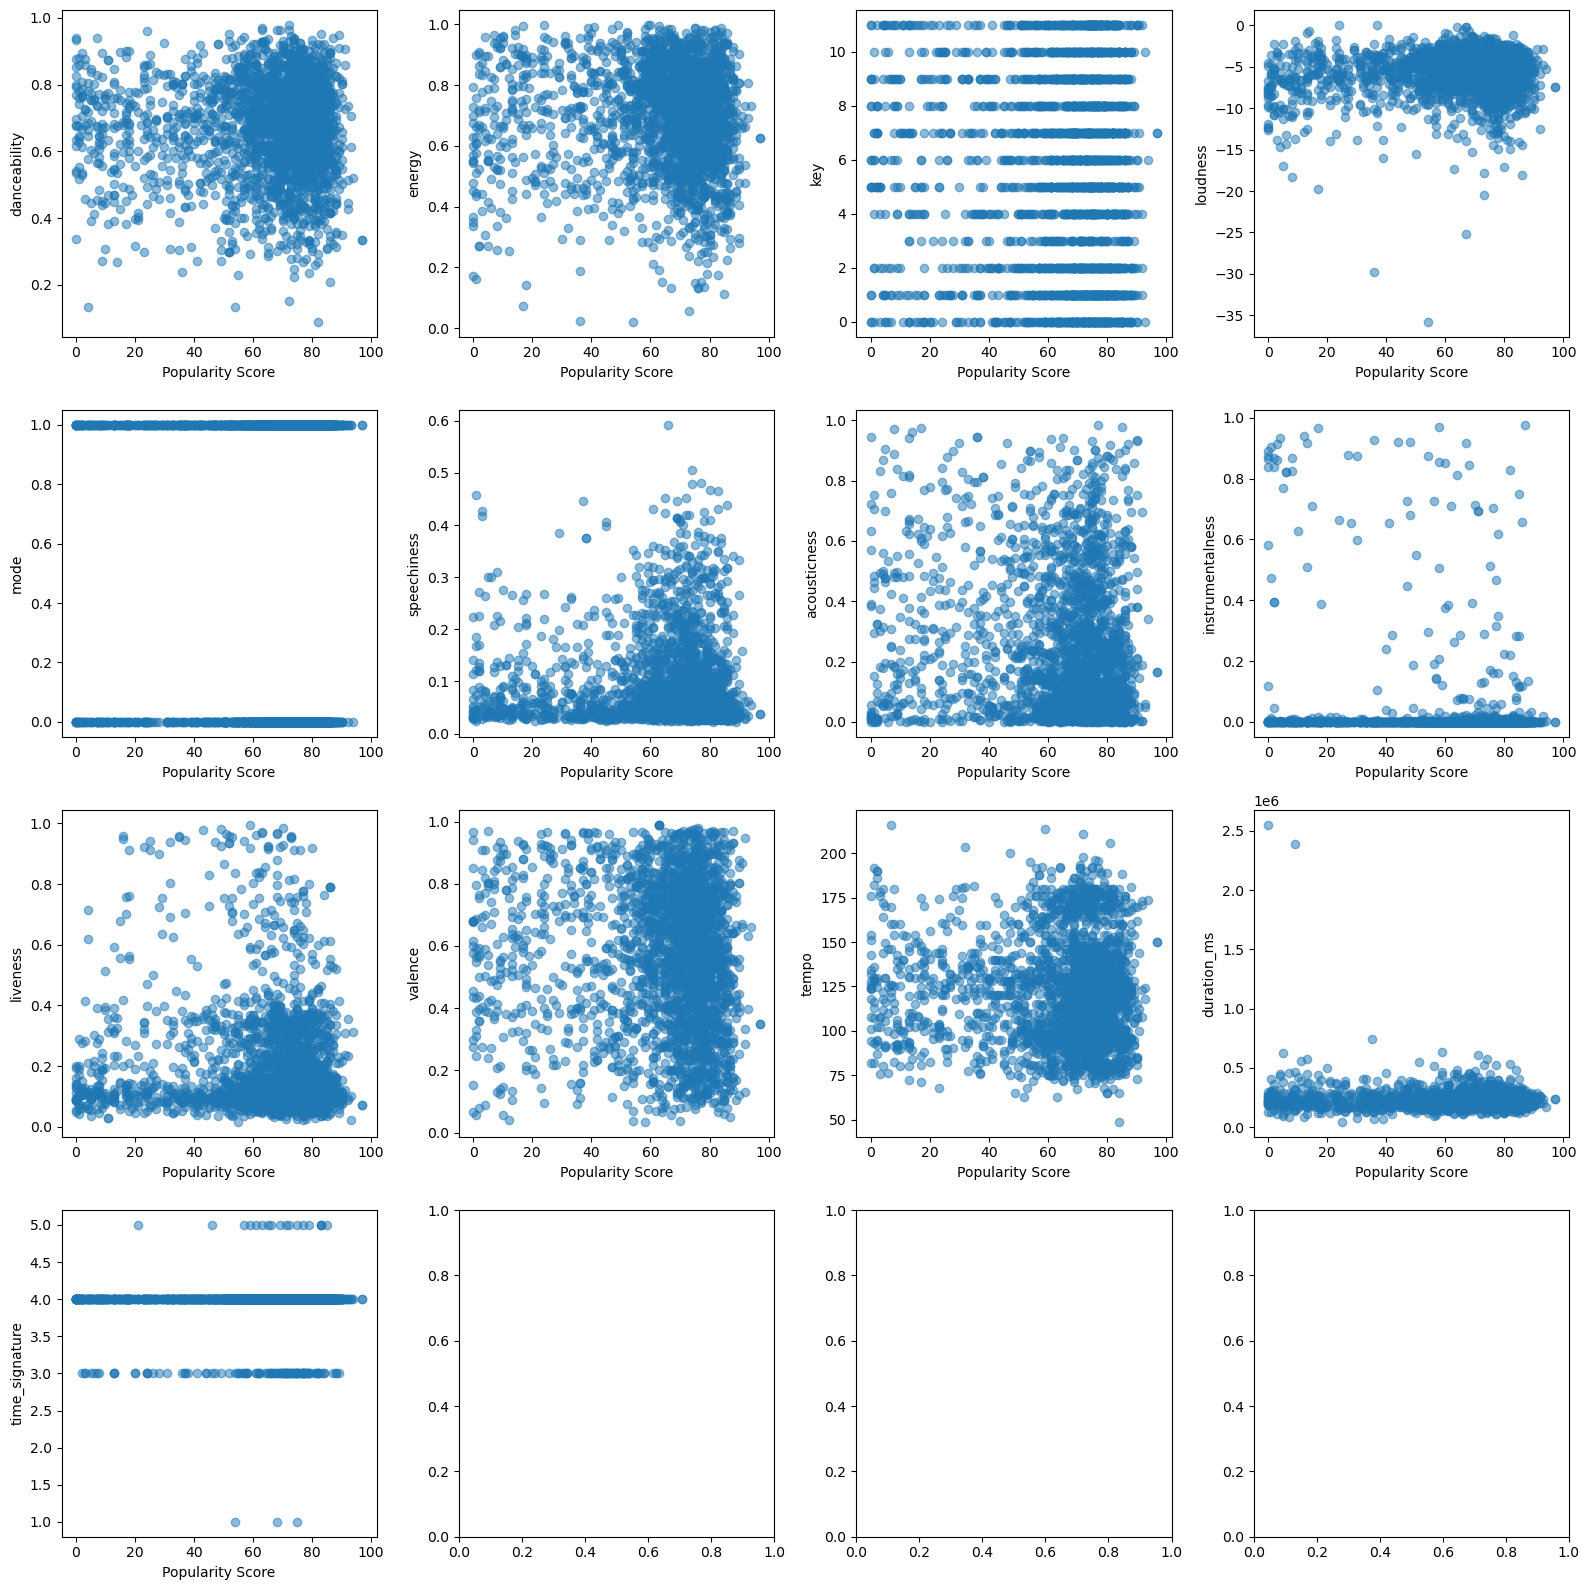

In [37]:
features = new_df.iloc[:, 0:13]
popularity_score = new_df['Popularity Score (Spotify)']

# Plotting scatter plots for each feature against the popularity score
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for i, col in enumerate(features.columns):
    ax = axes[i // 4, i % 4]
    ax.scatter(popularity_score, features[col], alpha=0.5)
    ax.set_xlabel('Popularity Score')
    ax.set_ylabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

### **Observation**

- It is clearly that there are not clear linear relationships between `Popularity Score (Spotify)` and other features. 
- For `key`, `mode` and `time_signature`, these features only have a few values so when we plot them, there are a few straight lines.
- For other features, the data seems to converge at some spots and there are a lot of outliers for each feature.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FFC436; padding: 15px; font-size: 18px; font-weight: bold; border-radius: 0 0 0 0">
Since our data doesn't consist of <font color=#E64848>NaN</font> values, let's move on to modelling step. 🎊🎊🎊
</div>

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  STEP 02: MODELLING 🔥
</div>

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  1. Splitting data 
</div>

First we will split our data into train, test and validation sets in order to avoid overfitting, that is an instance where a machine learning model fits its training data too well and fails to reliably fit additional data.

The original data in a machine learning model is typically taken and split into three or four sets. The three sets commonly used are the training set, the dev set and the testing set:

- The training set is the portion of data used to train the model. The model should observe and learn from the training set, optimizing any of its parameters.
- The validation set is a data set of examples used to change learning process parameters. It is also called the cross-validation or model validation set. This set of data has the goal of ranking the model's accuracy and can help with model selection.
- The testing set is the portion of data that is tested in the final model and is compared against the previous sets of data. The testing set acts as an evaluation of the final mode and algorithm.

Since our data is small, we will decide to split the data into 70-15-15 ratio for training, dev and test splits.

In [38]:
# Extracting the features and the target variable
X = new_df.iloc[:, 0:13]  # Features
y = new_df['Popularity Score (Spotify)']  # Target variable

In [39]:
# Splitting the data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [40]:
# Display the sizes of the resulting sets
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (1750, 13) (1750,)
Validation set: (375, 13) (375,)
Testing set: (375, 13) (375,)


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FFC436; padding: 15px; font-size: 18px; font-weight: bold; border-radius: 0 0 0 0">
Now we are ready to train our model.
</div>

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  2. Choosing metric
</div>

- Evaluation metrics are quantitative measures used to assess the performance and effectiveness of a statistical or machine learning model. These metrics provide insights into how well the model is performing and help in comparing different models or algorithms.

- When evaluating a machine learning model, it is crucial to assess its predictive ability, generalization capability, and overall quality. Evaluation metrics provide objective criteria to measure these aspects. The choice of evaluation metrics depends on the specific problem domain, the type of data, and the desired outcome.   

In this project, we are going to use RMSE metric to evaluate our model.

### **RMSE (Root Mean Squared Error)**

RMSE is the most popular evaluation metric used in regression problems. It follows an assumption that errors are unbiased and follow a normal distribution. Here are the key points to consider on RMSE:

- The power of ‘square root’ empowers this metric to show large number deviations.
- The ‘squared’ nature of this metric helps to deliver more robust results, which prevent canceling the positive and negative error values. In other words, this metric aptly displays the plausible magnitude of the error term.
- It avoids the use of absolute error values, which is highly undesirable in mathematical calculations.
- When we have more samples, reconstructing the error distribution using RMSE is considered to be more reliable.
- RMSE is highly affected by outlier values. Hence, make sure you’ve removed outliers from your data set prior to using this metric.
- As compared to mean absolute error, RMSE gives higher weightage and punishes large errors.

RMSE metric is given by:

RMSE = $\sqrt{\frac{1}{n} \Sigma_{i=1}^n({y}-\hat{y})^2}$

where n is the Total Number of Observations.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  3. First model: Linear Regression
</div>

- Since the scale of this project is just for freshman of Data Science so we will use LinearRegression library for modelling our data.

### Step 1: Train model on the training set

In [41]:
lir = LinearRegression()
lir.fit(X_train, y_train)

LinearRegression()

### Step 2: Fine-tune hyperparameters on the validation set

- Since Linear Regression doesn't have hyper-parameters, we will skip this test.
- But fine-tune is a crucial step for making machine learning models.

### Step 3: Re-train the model on the combined training and validation sets

In [42]:
# Step 3: Re-train the model on the combined training and validation sets
combined_X_train = pd.concat([X_train, X_val])
combined_y_train = pd.concat([y_train, y_val])
lir.fit(combined_X_train, combined_y_train)

LinearRegression()

### Step 4: Test the model on the testing set

In [43]:
# Step 4: Test the model on the testing set
y_test_pred = lir.predict(X_test)

### Step 5: Evaluate the model on the testing set using RMSE

In [44]:
# Step 5: Evaluate the model on the testing set using RMSE
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RMSE values: {rmse_test}')

RMSE values: 19.91821842170592


### Now let's see the result and visualize it.

In [45]:
result_df = pd.DataFrame({'Predictions': list(y_test_pred), 'Real Values':list(y_test)})
result_df

,Predictions,Real Values
0,69.345564,44
1,68.661279,88
2,66.377197,78
3,64.017675,47
4,70.475041,83
...,...,...
370,41.583828,70
371,61.749156,8
372,73.106520,75
373,68.535923,66


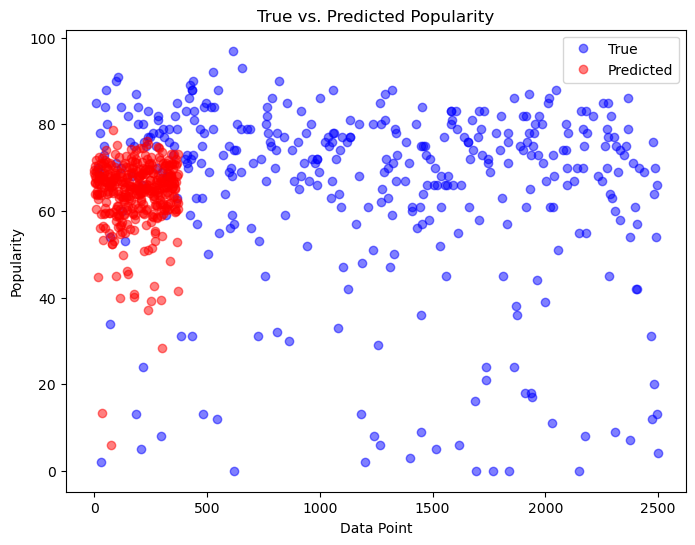

In [46]:
# Assuming y_test and y_test_pred are available
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='True', marker='o', linestyle='', color='blue', alpha=0.5)
plt.plot(y_test_pred, label='Predicted', marker='o', linestyle='', color='red', alpha=0.5)
plt.title('True vs. Predicted Popularity')
plt.xlabel('Data Point')
plt.ylabel('Popularity')
plt.legend()
plt.show()

- While true values converge all the way from 0 to 2500, predicted values only converge at 0 to 500 data point and the popularity we got are mostly from 60 to 70.

In [47]:
coef_df = pd.DataFrame({'Coef': lir.coef_})
row_names = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
             'valence', 'tempo', 'duration_ms', 'time_signature']
coef_df.index = row_names
coef_df

,Coef
danceability,-4.355930
energy,-26.866280
key,-0.235039
loudness,1.231018
mode,-1.392834
speechiness,-1.095706
acousticness,-16.666503
instrumentalness,-30.971453
liveness,-5.646161
valence,-4.219437


## **Observation**

- As can be seen, the model is having a very difficult time predicting the very high (and low) popularity scores. This mean the model predicts poorly on our data. We have already considered this.
- Rmse that we got on the test step is pretty high and when comparing predictions and true values on small popularity scores, there are some huge diffrences.
- The coefs we got have lots of negative values which means with our model, when our features increase, popularity score easily to decrease.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  4. Second model: Polynomial Regression
</div>

- Since Linear Regression model doesn't perform pretty well. We decided to choose another model for our data Polynomial Regression, which is also similar to Linear Regression.


- In polynomial regression, we describe the relationship between the independent variable x and the dependent variable y using an nth-degree polynomial in x. Polynomial regression, denoted as E(y|x), characterizes fitting a nonlinear relationship between the x value and the conditional mean of y. 

- One important distinction between Linear and Polynomial Regression is that Polynomial Regression does not require a linear relationship between the independent and dependent variables in the data set. When the Linear Regression Model fails to capture the points in the data and the Linear Regression fails to adequately represent the optimum, then we use Polynomial Regression.

### Advantages:

- The best approximation of the connection between the dependent and independent variables is a polynomial. It can accommodate a wide range of functions. Polynomial is a type of curve that can accommodate a wide variety of curvatures.

### Disadvantages:

- One or two outliers in the data might have a significant impact on the nonlinear analysis’ outcomes. These are overly reliant on outliers. Furthermore, there are fewer model validation methods for detecting outliers in nonlinear regression than there are for linear regression.

### Hyper-parameter

 - The hyper-parameter of Polynomial Regression is the degree. 
 - If the degree is large enough, we can easily to get the correct model for our model since the RMSE is close to zero, but this will cause overfitting since it only true for the train model.
 - To avoid overfitting, we need to have the validation in order to get the best degree for our model.

In [48]:
# Initialize variables to store the rmse and the degree
degrees = []
rmse_degree = []

### Step 01: Loops for each degree, train on training test and validate on validation test

In [49]:
# Iterate over different degrees
for degree in range(1, 9):
    # Polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_val = poly_features.transform(X_val)

    # Linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)

    # Evaluate the model on the validation set
    y_val_pred = lin_reg.predict(X_poly_val)
    rmse_val = sqrt(mean_squared_error(y_val, y_val_pred))

    # Append to degrees list and rsme_degree list
    degrees.append(degree)
    rmse_degree.append(rmse_val)

In [50]:
print(degrees)
print(rmse_degree)

[1, 2, 3, 4, 5, 6, 7, 8]
[19.828393792883354, 21.00217924013611, 21.466490248453987, 22.400151647233447, 24.022830500524353, 23.730305432676136, 22.17853551676673, 24.255198255674674]


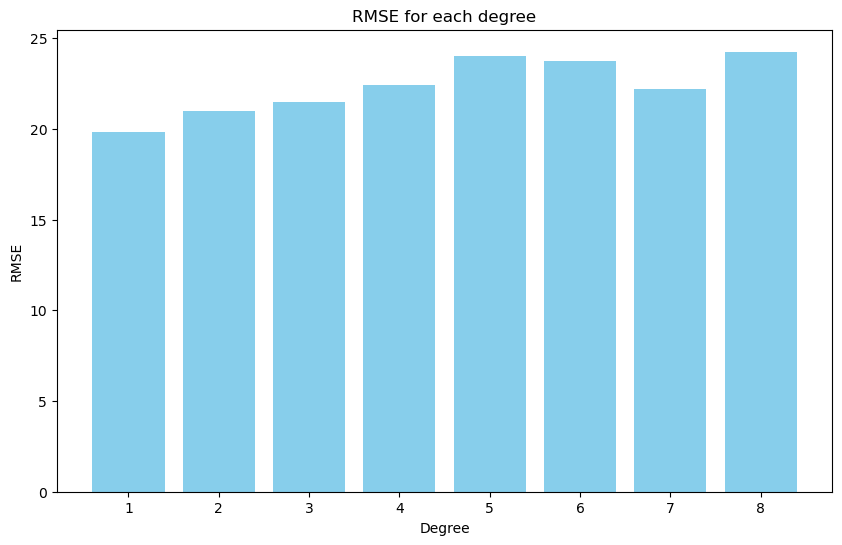

In [51]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(degrees, rmse_degree, color='skyblue')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.title('RMSE for each degree')
plt.show()

**Observation**

- As we can see, when degree = 1, the model has the least RMSE on the validation set but this is also means that our Polymonial Regression model becomes Linear Regression model.
- So for comparison, we will choose the degree with the 2nd lowest RMSE which is 3.

### Step 2: Re-train the model on the combined training and validation sets

In [52]:
degree = 3

X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)

# Polynomial features
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train_val)

# Linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y_train_val)

LinearRegression()

### Step 3: Test the model on the testing set

In [53]:
X_poly_test = poly_features.fit_transform(X_test)
y_test_pred = lin_reg.predict(X_poly_test)

### Step 4: Evaluate the model on the testing set using RMSE


In [54]:
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RMSE values: {rmse_test}')

RMSE values: 40.636030012921616


In [55]:
result_df = pd.DataFrame({'Predictions': list(y_test_pred), 'Real Values':list(y_test)})
result_df

,Predictions,Real Values
0,68.579833,44
1,83.990268,88
2,46.144132,78
3,73.798695,47
4,67.516765,83
...,...,...
370,48.345164,70
371,70.799160,8
372,73.854343,75
373,72.907481,66


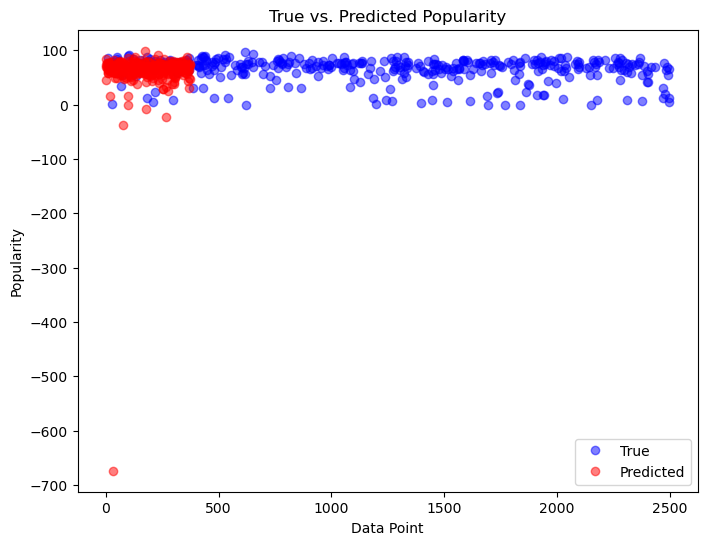

In [56]:
# Assuming y_test and y_test_pred are available
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='True', marker='o', linestyle='', color='blue', alpha=0.5)
plt.plot(y_test_pred, label='Predicted', marker='o', linestyle='', color='red', alpha=0.5)
plt.title('True vs. Predicted Popularity')
plt.xlabel('Data Point')
plt.ylabel('Popularity')
plt.legend()
plt.show()

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  5. Third model: Neural Network
</div>

**Step 1: Function to split and standardize data**

In [57]:
# Function to split data into train, test, and validation sets
def split_data(data, test_size=0.2, validation_size=0.2):
    train, test = train_test_split(data, test_size=test_size)
    train, val = train_test_split(train, test_size=validation_size)
    return train, val, test

# Function to standardize data
def standardize_data(train_features, test_features, val_features):
    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features)
    test_features = scaler.transform(test_features)
    val_features = scaler.transform(val_features)
    return train_features, test_features, val_features


**Step 2: Function to convert data to PyTorch tensors**

In [58]:
def convert_to_tensors(train_features, train_labels, test_features, test_labels, val_features, val_labels):
    train_features = torch.from_numpy(train_features.astype(np.float32))
    train_labels = torch.from_numpy(train_labels.values.astype(np.float32))
    test_features = torch.from_numpy(test_features.astype(np.float32))
    test_labels = torch.from_numpy(test_labels.values.astype(np.float32))
    val_features = torch.from_numpy(val_features.astype(np.float32))
    val_labels = torch.from_numpy(val_labels.values.astype(np.float32))
    return train_features, train_labels, test_features, test_labels, val_features, val_labels

def build_dataloader(train_features, train_labels, val_features, val_labels, test_features, test_labels, batch_size=64):
    train_data = TensorDataset(train_features, train_labels)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_data = TensorDataset(val_features, val_labels)
    val_loader = DataLoader(val_data, batch_size=batch_size)
    test_data = TensorDataset(test_features, test_labels)
    test_loader = DataLoader(test_data, batch_size=batch_size)
    return train_loader, val_loader, test_loader

# Function to build the neural network model
def build_model(input_size=13, hidden_size=64):
    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, 1)
    )
    return model

**Step 3: Train, fine_tune and test the model**

In [59]:
def train_model(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def eval_model(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    model.eval()
    test_lost = 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_lost += loss_fn(pred, y).item()
    test_lost /= size
    print(f'Average test loss: {test_lost:>8f} \n')

def fine_tune(model, optimizer, dataloader, loss_fn, fine_tune_epochs=10):
    model.train()  # Set the model back to training mode
    for epoch in range(fine_tune_epochs):
        for batch, (X, y) in enumerate(dataloader):
            pred = model(X)
            loss = loss_fn(pred, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    return model, optimizer
    


**Step 4: Now, we will write function on assess model with the value of `RMSE`**

In [60]:
def calculate_rmse(model, test_loader, test_labels):
    model.eval()
    preds = []

    with torch.no_grad():
        for X, y in test_loader:
            pred = model(X)
            preds.append(pred.numpy())

    preds = np.concatenate(preds)
    rmse = sqrt(mean_squared_error(test_labels, preds))
    print(f"RMSE: {rmse}")


In [61]:
train, val, test = split_data(new_df)
    
train_features, train_labels, test_features, test_labels, val_features, val_labels = train.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, :-1], test.iloc[:, -1], val.iloc[:, :-1], val.iloc[:, -1]
    
train_features, test_features, val_features = standardize_data(train_features, test_features, val_features)

train_features, train_labels, test_features, test_labels, val_features, val_labels = convert_to_tensors(train_features, train_labels, test_features, test_labels, val_features, val_labels)
    
train_labels, test_labels = train_labels.reshape(-1, 1), test_labels.reshape(-1, 1)
    
train_loader, val_loader, test_loader = build_dataloader(train_features, train_labels, val_features, val_labels, test_features, test_labels)

In [62]:
model = build_model()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

epochs = 100
fine_tune_epochs = 10

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_model(train_loader, model, loss_fn, optimizer)
    eval_model(val_loader, model, loss_fn)
    model, optimizer = fine_tune(model, optimizer, val_loader, loss_fn, fine_tune_epochs)



calculate_rmse(model, test_loader, test_labels)


Epoch 1
-------------------------------


c:\Users\Hp\anaconda3\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\Hp\anaconda3\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Average test loss: 11.310805 

Epoch 2
-------------------------------
Average test loss: 9.468168 

Epoch 3
-------------------------------
Average test loss: 9.195624 



Epoch 4
-------------------------------
Average test loss: 8.955221 

Epoch 5
-------------------------------
Average test loss: 8.747372 

Epoch 6
-------------------------------
Average test loss: 9.012835 

Epoch 7
-------------------------------
Average test loss: 8.925428 

Epoch 8
-------------------------------
Average test loss: 9.003654 

Epoch 9
-------------------------------
Average test loss: 8.764184 

Epoch 10
-------------------------------
Average test loss: 9.422691 

Epoch 11
-------------------------------
Average test loss: 8.782731 

Epoch 12
-------------------------------
Average test loss: 11.082978 

Epoch 13
-------------------------------
Average test loss: 8.924530 

Epoch 14
-------------------------------
Average test loss: 11.097867 

Epoch 15
-------------------------------
Average test loss: 8.788199 

Epoch 16
-------------------------------
Average test loss: 8.669969 

Epoch 17
-------------------------------
Average test loss: 9.646237 

Epoch 18
-

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  5. Comparing
</div>

* Finally, after perform modeling on the data, we come into a conclusion that `Neural Network` defined that get the lowest RMSE values, with the result of around above 19.
* The next model that could be considered to be quite good is the Linear Regression model with the result of around above 20.
* However, the final result is not that good, since the RMSE values are still quite high. This could be caused by the data that we have, which is not that much. Therefore, the model could not be trained well.